In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

# Loading Training and Test data sets
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)

K = len(np.unique(y_train)) # Number of Classes
Ntr = x_train.shape[0]      # Number of Training examples
Nte = x_test.shape[0]       # Number of Testing examples
Din = 3072                  # CIFAR10 (Size of an example)

# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

# Subtract the means of images to make the network less sensitive to differing background and lightening conditions.
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image

# Obtaining a binary numpy array from y_train and y_test
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)

# Reshape image arrays from 32 x 32 x 3 into 1 x  3072
x_train = np.reshape(x_train,(Ntr,Din)).astype('float32')
x_test = np.reshape(x_test,(Nte,Din)).astype('float32')

170500096/170498071 [==============================] - 11s 0us/step
x_train:  (50000, 32, 32, 3)


In [16]:
std=1e-5                              # Standard deviation
w1 = std*np.random.randn(Din, K)      # Weights matrix
b1 = np.zeros(K)                      # Bias vector
print("w1:", w1.shape)
print("b1:", b1.shape)

batch_size = Ntr                    # Batch size

iterations = 300                    # Number of iterations to run Gradient Descent (For this case it equals to 300 epochs)
alpha = 5e-3                        # Learning Rate
alpha_decay= 0.999                  # Decay learning rate for convergence
Lambda = 5e-6                       # Regularization rate

loss_history = []                   # Loss history
train_acc_history = []              # Traing accuracy history

# Random Generator
seed = 0
rng = np.random.default_rng(seed=seed)

for t in range(iterations):
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    # Forward pass
    x = x_train[indices]
    y = y_train[indices]
    y_pred = x.dot(w1) + b1
    loss = (1./batch_size)*(np.square(y_pred - y).sum()) + (Lambda * np.sum(w1 * w1))
    loss_history.append(loss)

    # Printing Loss in each 10 iterations
    if t % 10 == 0:
        print('iteration %d / %d: loss %f ' %(t, iterations, loss))

    # Backward pass
    dy_pred = (1./batch_size)*2.0*(y_pred - y)              # PD of loss w.r.t. y_pred
    dw1 = x.T.dot(dy_pred) + Lambda * w1                    # PD of loss w.r.t. w1 
    db1 = dy_pred.sum(axis = 0)                             # PD of loss w.r.t. b1
    w1 -= alpha * dw1                                       # Update weights
    b1 -= alpha * db1                                       # Update biases
    alpha *= alpha_decay                                    # Decay learning rate

    # Appending Train accuracy to history
    y_pred = x.dot(w1) + b1
    train_acc = 1.0 - 1/(Ntr*9)*(np.abs(np.argmax(y_train, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
    train_acc_history.append(train_acc)

w1: (3072, 10)
b1: (10,)
iteration 0 / 300: loss 1.000001 
iteration 10 / 300: loss 0.919936 
iteration 20 / 300: loss 0.892832 
iteration 30 / 300: loss 0.874421 
iteration 40 / 300: loss 0.860480 
iteration 50 / 300: loss 0.849460 
iteration 60 / 300: loss 0.840560 
iteration 70 / 300: loss 0.833282 
iteration 80 / 300: loss 0.827275 
iteration 90 / 300: loss 0.822284 
iteration 100 / 300: loss 0.818109 
iteration 110 / 300: loss 0.814598 
iteration 120 / 300: loss 0.811626 
iteration 130 / 300: loss 0.809097 
iteration 140 / 300: loss 0.806933 
iteration 150 / 300: loss 0.805069 
iteration 160 / 300: loss 0.803456 
iteration 170 / 300: loss 0.802051 
iteration 180 / 300: loss 0.800820 
iteration 190 / 300: loss 0.799735 
iteration 200 / 300: loss 0.798773 
iteration 210 / 300: loss 0.797915 
iteration 220 / 300: loss 0.797147 
iteration 230 / 300: loss 0.796453 
iteration 240 / 300: loss 0.795825 
iteration 250 / 300: loss 0.795253 
iteration 260 / 300: loss 0.794729 
iteration 270 

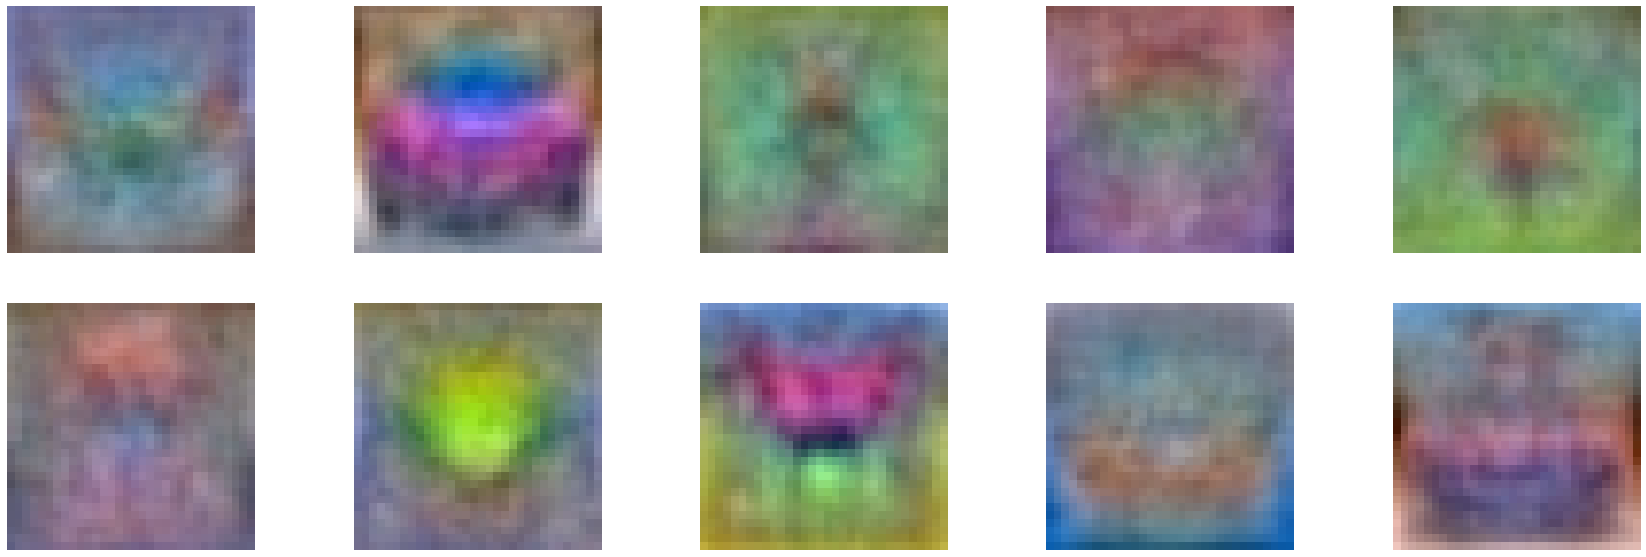

train_acc =  0.7498355555555556
test_acc =  0.7487222222222223
test_loss =  0.7946054126919255


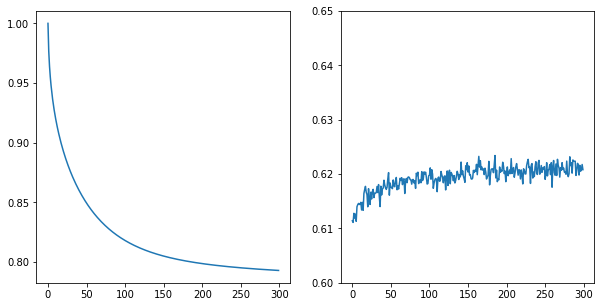

In [39]:
import cv2 as cv
# Printing accuracies and displaying w as images

# Weight Matrix W1 as 10 images
f, axarr = plt.subplots(2, 5)
f.set_size_inches(30, 10)
# Data required for image normalization
w_min, w_max = np.min(w1), np.max(w1)

for i in range(5):
    img1 = w1[:,i].reshape(32,32,3)
    img2 = w1[:,5+i].reshape(32,32,3)
    # Rescale images between 0 and 255
    img1 = 255 * (img1-w_min)/(w_max-w_min)
    img2 = 255 * (img2-w_min)/(w_max-w_min)
    axarr[0][i].imshow(img1.astype('uint8'))
    axarr[1][i].imshow(img2.astype('uint8'))
    axarr[0][i].axis('off')
    axarr[1][i].axis('off')
plt.show()

# History
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].plot(loss_history)                # Training Loss History
ax[1].plot(train_acc_history)           # Training Accuracy History
ax[1].set_ylim(0.6,0.65)

# Calculating and Printing Training Accuracy
x_t = x_train
y_pred = x_t.dot(w1) + b1
train_acc = 1.0 - 1/(Ntr*9)*(np.abs(np.argmax(y_train, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
print("train_acc = ",train_acc)

# Calculating and Printing Testing Accuracy
x_t = x_test
y_pred = x_t.dot(w1) + b1
test_acc =  1.0 - 1/(Nte*9)*(np.abs(np.argmax(y_test, axis = 1) - np.argmax(y_pred, axis = 1))).sum()
print("test_acc = ",test_acc)

# Testing Loss
test_loss = (1./Nte)*(np.square(y_pred - y_test).sum())
print("test_loss = ",test_loss)

alpha 5e-3 loss_tr = 0.7934, acc_tr = 0.7499, loss_te = 0.7946, acc_te = 0.7487

alpha 1e-3 loss_tr = 0.8481, acc_tr = 0.7354, loss_te = 0.8464, acc_te = 0.7413

alpha 1e-2 loss_tr = 0.7860, acc_tr = 0.7540, loss_te = 0.7893, acc_te = 0.7481

alpha 6e-3 loss_tr = 0.7911, acc_tr = 0.7597, loss_te = 0.7928, acc_te = 0.7480